In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

#mpl.style.use('classic')

import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
#Especifico los colores

c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'

colors=[c1, c2, c3, c4]

In [7]:
Ns2 = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 900, 1000]

kernel2files=['dataJW/revisited/KernelFidelity/Kernel_II' + str(N) + '.npy' for N in Ns2]
distance2files = ['dataJW/revisited/KernelFidelity/distance_ll_06-07_16-17' + str(N) + '.npy' for N in Ns2]
support2 = ['dataJW/revisited/KernelFidelity/supportvs_ll_06-07_16-17' + str(N) + '.npy' for N in Ns2]


In [8]:
def analyzingresults (Ns2, distance2files, support2):
    plt.rcParams['figure.figsize'] = 5, 4
    plt.rcParams['lines.linewidth'] = 1.8
    plt.rcParams['font.size'] = 18

    Jcsdistance = []
    
    for N, distance2file, supportvs2 in zip(Ns2, distance2files, support2):
        data2 = np.load(distance2file, allow_pickle = True)
        Js2= data2[0]
        ds2=data2[1]
        
        mod_ds = np.abs(ds2)
        idx = np.argmin(mod_ds)

        if ds2[idx] < 0:
            Jl = Js2[idx]
            dl = ds2[idx]
            Jr = Js2[idx + 1]
            dr = ds2[idx + 1]

        else:
            Jl = Js2[idx - 1]
            dl = ds2[idx - 1]
            Jr = Js2[idx]
            dr = ds2[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsdistance.append(Jcdistance)
    
    print("Jdistance" + str (Jcsdistance))
    return(Jcsdistance)

In [9]:
Jcsdistance= analyzingresults(Ns2, distance2files, support2)

Jdistance[1.0240087511621605, 1.014222963399381, 1.0058423234155889, 1.0058128927559757, 1.0104678095265096, 1.0420391269178717, 1.0850549379281653, 1.1219629794828196, 1.1531830896396003, 1.1798813040875198, 1.222975691269873, 1.240490477141874]


In [27]:
Jcsdistance=[1.0240087511621605, 1.014222963399381, 1.0058423234155889, 1.0058128927559757, 1.0104678095265096, 1.0420391269178717, 1.0850549379281653, 1.1219629794828196, 1.1531830896396003, 1.1798813040875198, 1.222975691269873, 1.240490477141874]
Ns2 = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 900, 1000]

def comparingmethods (Ns, Jcsdistance):

    Js = np.load('dataJW/JsBenchmark.npy', allow_pickle = True)
    Nsbench = np.load('dataJW/NsBenchmark.npy', allow_pickle = True)
    print(Nsbench)


    plt.plot(Ns, Jcsdistance, label = r'SVM', c=c3, lw = 0, marker = 'o')
    plt.plot(Nsbench, Js, label = r'Scaling', c=c2,  lw = 0, marker = 'o')
    plt.legend(fontsize=10, loc = "lower right", framealpha=0.3, numpoints=1)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)

    plt.xlabel(r'N', fontsize=11)
    plt.ylabel(r'$J_c$(N)', fontsize=11)
    plt.xscale('log')
    #plt.xlim(10, 1300)
    plt.axhline(1, c = 'k',ls='dotted', lw = '1')

    plt.savefig("comparaciontfg.pdf", bbox_inches='tight')
    plt.show()

[  10   20   50  100  200  300  400  500  600  700  900 1000]


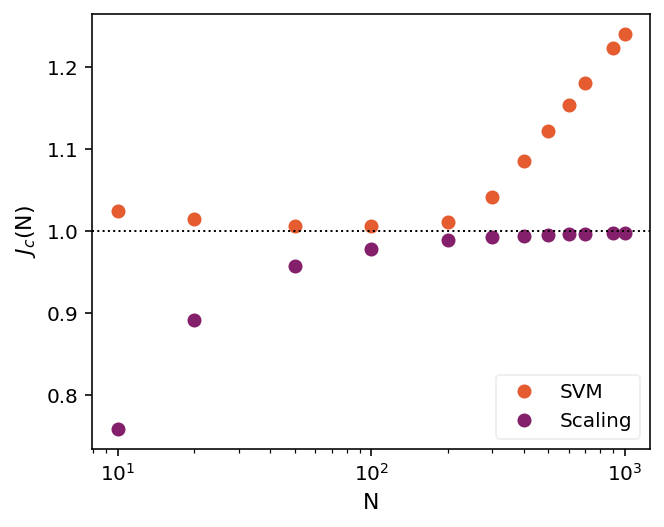

In [28]:

comparingmethods (Ns2, Jcsdistance)

In [255]:
def comparingtrainings(Ns, Nsrdm, distanceintfiles, distancerdmfiles, distanceintfiles2):
    
    plt.rcParams['figure.figsize'] = 5, 4
    plt.rcParams['lines.linewidth'] = 1.8
    plt.rcParams['font.size'] = 18

    Jcsinterval = []
    Jcsrandom = []
    Jcsint2 = []
    Jsbench = np.load('dataJW/JsBenchmark.npy', allow_pickle = True)
    Nsbench = np.load('dataJW/NsBenchmark.npy', allow_pickle = True)
    
    for N, distancefile in zip(Ns, distanceintfiles):
        data = np.load(distancefile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        
        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)
        
        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
        
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsinterval.append(Jcdistance)
    
    for N, distancerdmfile in zip(Nsrdm, distancerdmfiles):
        data = np.load(distancerdmfile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsrandom.append(Jcdistance)
    print(len(Jcsrandom))
    for N, distance2file in zip(Ns, distanceintfiles2):
        data = np.load(distance2file, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsint2.append(Jcdistance)

    plt.plot(Nsrdm, Jcsrandom, label = 'random', c=c1,  lw = 0, marker = 'o')
    plt.plot(Ns, Jcsinterval, label = '[0.8, 0.9]&[1.2, 1.3]', c=c2, lw = 0, marker = 'o')
    plt.plot(Ns, Jcsint2, label = '[0.6, 0.7]&[1.6, 1.7]', c=c3, lw = 0, marker = 'o')
    plt.legend(fontsize=8, loc = "upper left", framealpha=0.3, numpoints=1)
    plt.xlabel(r'$N$', fontsize=12)
    plt.ylabel(r'$J_c(N)$', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    #plt.xlim(800, 4200)
    plt.ylim(0.9, 1.3)
    plt.axhline(1, c = 'k', lw = '1', ls='dotted')
    plt.xticks(fontsize=10)
    
    #plt.savefig("entrenarlambdatfg.pdf", bbox_inches='tight')
    plt.show()

21


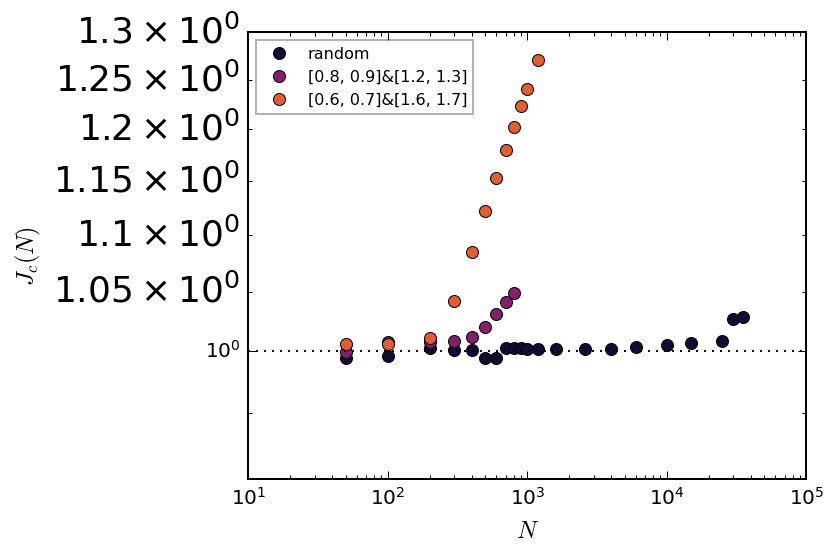

In [256]:
Ns = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200]
Nsrdm= [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1600, 2600, 4000, 6000, 10000, 15000, 25000, 30000, 35000]

distanceintfiles = ['dataJW/revisited/KernelFidelity/distance_ll' + str(N) + '.npy' for N in Ns]
distancerdmfiles = ['dataJW/distanceJWrdm' + str(N) + '.npy' for N in Nsrdm]
distanceintfiles2 = ['dataJW/revisited/KernelFidelity/distance_ll_06-07_16-17' + str(N) + '.npy' for N in Ns]

comparingtrainings(Ns, Nsrdm, distanceintfiles, distancerdmfiles, distanceintfiles2)



16
nurdm =  0.9376882342220793
b =  0.995936749173636
a =  -1.891005801093586
[[2.07086217e-02 9.06374244e-07 1.47016822e-03]
 [9.06374244e-07 4.19223355e-11 6.47580682e-08]
 [1.47016822e-03 6.47580682e-08 1.04460264e-04]]
nuint =  1.0896376541007422
b =  1.0024112484814354
a =  0.27080645504779854
[[ 4.79449743e-05  7.63595937e-09 -3.27448777e-05]
 [ 7.63595937e-09  1.26859496e-12 -5.24578411e-09]
 [-3.27448777e-05 -5.24578411e-09  2.23838120e-05]]


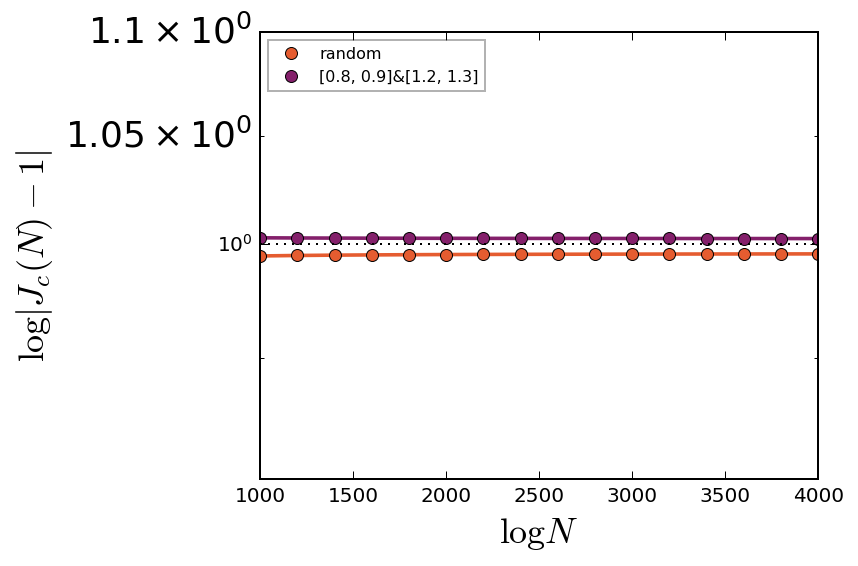

In [207]:
#KernelLambda

Ns = np.arange(1000, 4001, 200)

distanceintfiles = ['dataJW/revisited/distance_ll' + str(N) + '.npy' for N in Ns]
distancerdmfiles = ['dataJW/revisited/distance_ll_random' + str(N) + '.npy' for N in Ns]


comparingtrainings(Ns, Ns, distanceintfiles, distancerdmfiles, distanceintfiles)



In [53]:
def distancia_int(Ns, distanceJWfiles, supportJW):

    for N, distance2file, supportvs2 in zip(Ns, distanceJWfiles, supportJW):
        data2 = np.load(distance2file, allow_pickle = True)
        Js2= data2[0]
        ds2=data2[1]
        supportvs2 = np.load(supportvs2, allow_pickle = True)
        plt.plot(Js2, ds2, c=c3, lw='2', label = '$N=$'+str(N))
        if supportvs2.all():
            for i, s in enumerate(supportvs2):
                #print(ds2[np.where(Js2==s)])
                plt.plot(s, ds2[np.where(Js2==s)], lw=0, marker='o', c=c3)
        print(len(supportvs2))

        plt.legend(fontsize=10, loc = "lower right", framealpha=0.3, numpoints=1)
        #i=i+1
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(r'J', fontsize=12)
        plt.ylabel(r'd', fontsize=12)
        #plt.title('$N=$'+str(N), loc='center', fontsize=15, pad=-15)
        ax = plt.gca()
        ax.add_patch(plt.Rectangle((0.6, -2), 0.1, 3.5, alpha=0.35, color='gainsboro'))
        ax.add_patch(plt.Rectangle((1.6, -2), 0.1, 3.5, alpha=0.35, color='gainsboro'))
        #plt.savefig('distintervalotfg'+str(N)+'.pdf', bbox_inches='tight')
        plt.show()

4


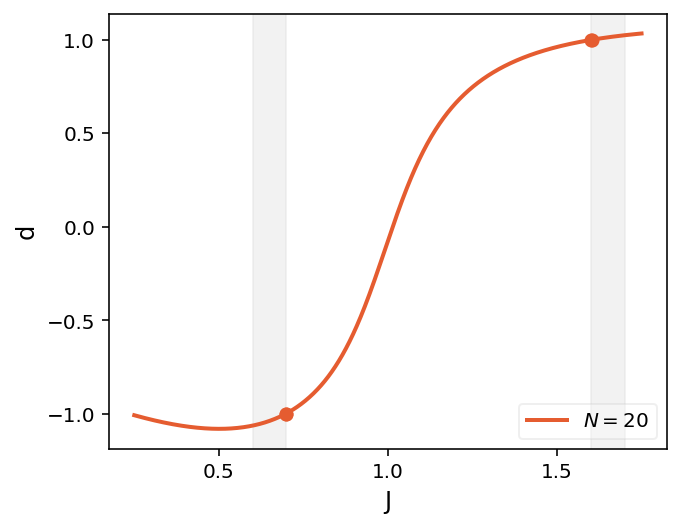

4


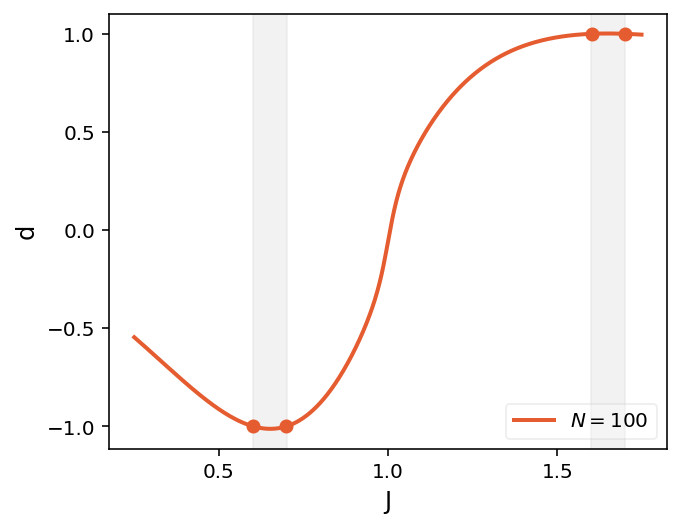

4


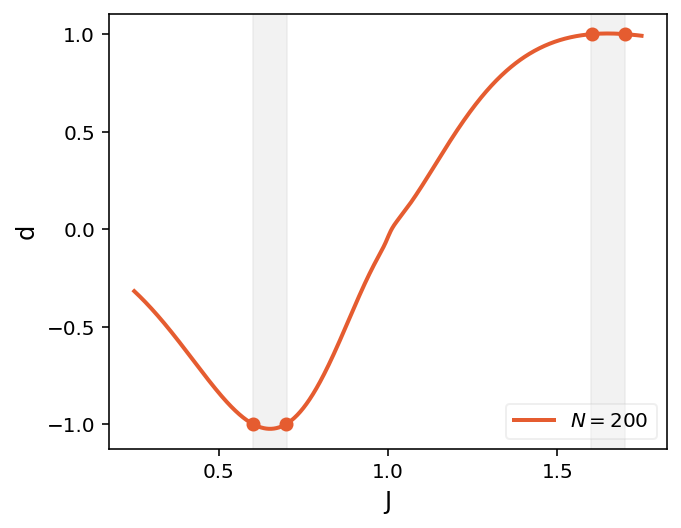

4


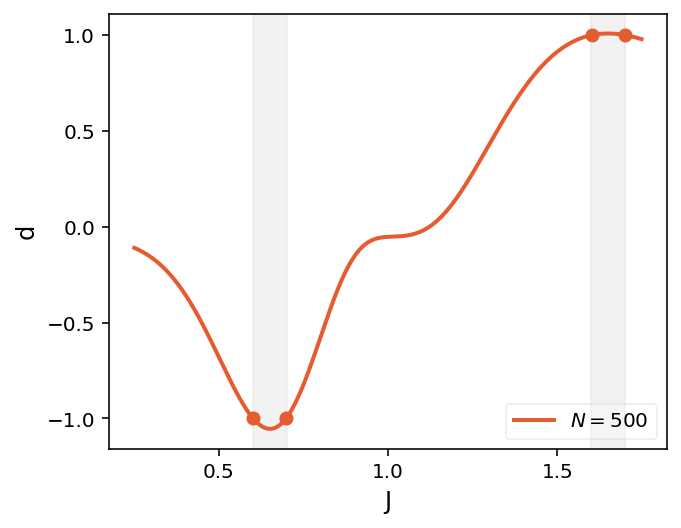

4


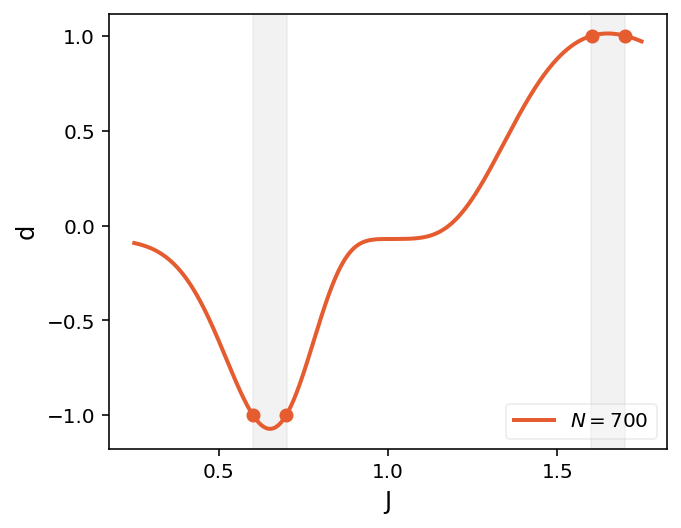

4


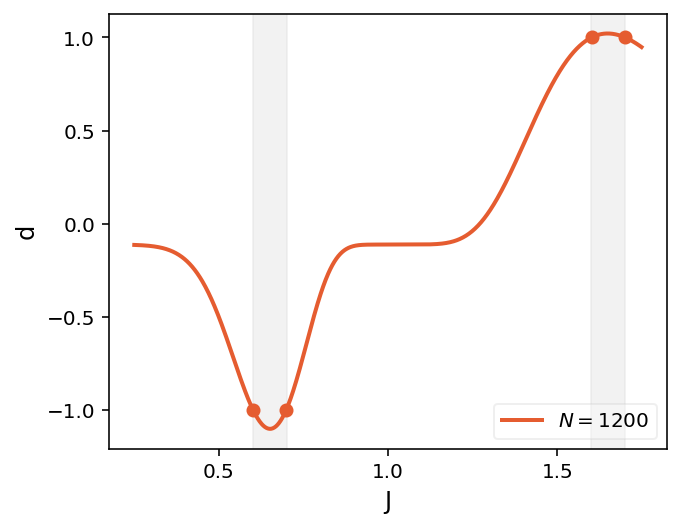

In [16]:
Ns = [20, 100, 200, 500, 700, 1200]

distanceJWfiles = ['dataJW/revisited/KernelFidelity/distance_ll_06-07_16-17' + str(N) + '.npy' for N in Ns]
supportJW = ['dataJW/revisited/KernelFidelity/supportvs_ll_06-07_16-17' + str(N) + '.npy' for N in Ns]

distancia_int(Ns, distanceJWfiles, supportJW)


In [17]:
def distancia_rdm(Ns, distance2files, support2):
    i=0

    for N, distance2file, supportvs2 in zip(Ns, distance2files, support2):
        data2 = np.load(distance2file, allow_pickle = True)
        Js2= data2[0]
        ds2=data2[1]
        supportvs2 = np.load(supportvs2, allow_pickle = True)
        plt.plot(Js2, ds2, c=c3, lw='2', label = '$N=$'+str(N))
        if supportvs2.all():
            for i, s in enumerate(supportvs2):
                #print(ds2[np.where(Js2==s)])
                plt.plot(s, ds2[np.where(Js2==s)], lw=0, marker='o', c=c3)
        #plt.title(str(N))
        plt.legend(fontsize=10, loc = "lower right", framealpha=0.3, numpoints=1)
        #i=i+1
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(r'J', fontsize=12)
        plt.ylabel(r'd', fontsize=12)

        #plt.title('$N=$'+str(N), loc='center', fontsize=15, pad=-15)
        plt.savefig('distanciardmtfg'+str(N)+'.pdf', bbox_inches='tight')
        plt.show()

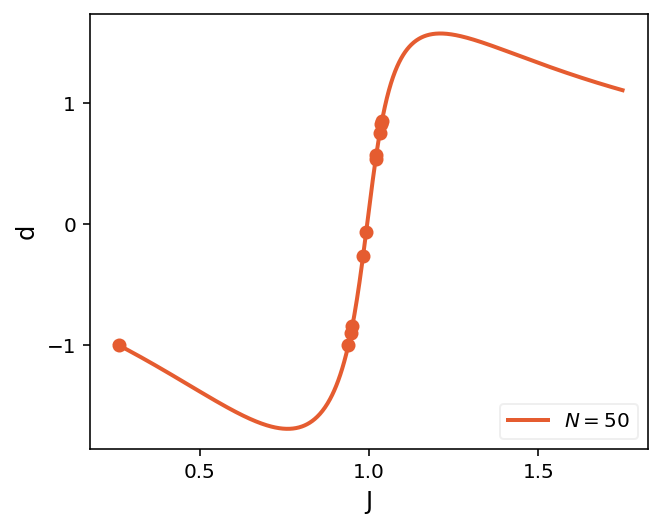

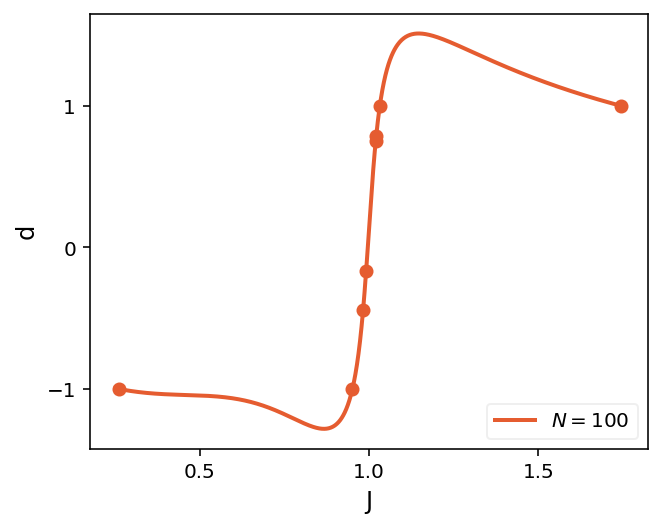

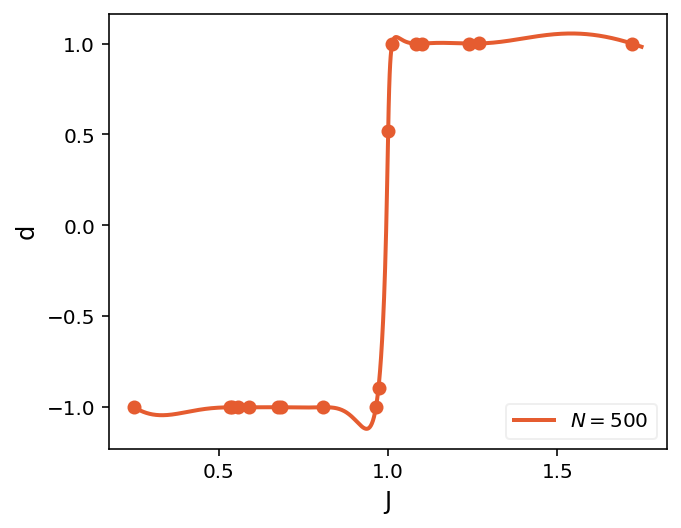

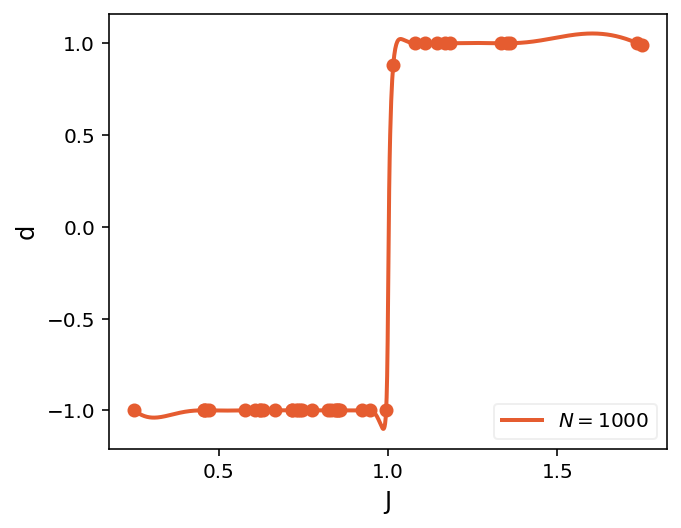

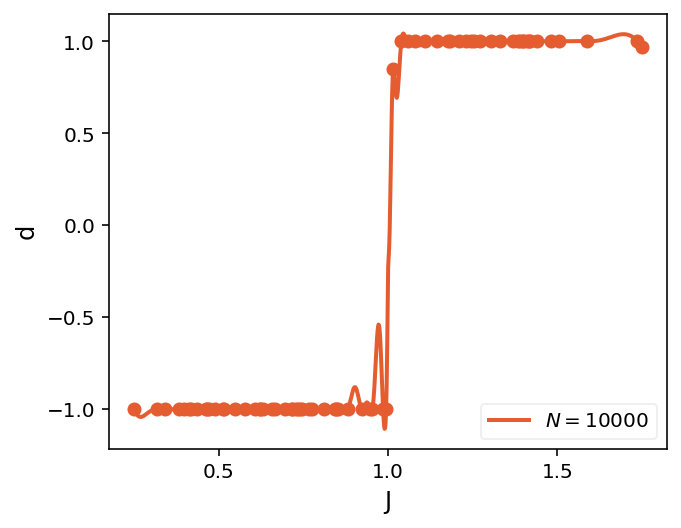

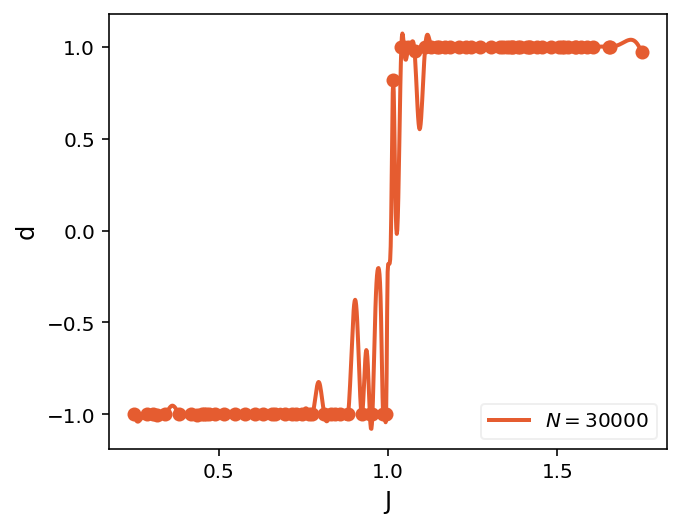

In [18]:
Ns = [50, 100, 500, 1000, 10000, 30000]

kernel2files=['dataJW/KernelJWrdm' + str(N) + '.npy' for N in Ns]
distance2files = ['dataJW/distanceJWrdm' + str(N) + '.npy' for N in Ns]
support2 = ['dataJW/supportvsrdm' + str(N) + '.npy' for N in Ns] 

distancia_rdm(Ns, distance2files, support2)

In [80]:
def distanciaλ_int(Ns, distanceJWfiles, supportJW):

    for N, distance2file, supportvs2 in zip(Ns, distanceJWfiles, supportJW):
        data2 = np.load(distance2file, allow_pickle = True)
        Js2= data2[0]
        ds2=data2[1]
        supportvs2 = np.load(supportvs2, allow_pickle = True)
        plt.plot(Js2, ds2, c=c3, lw='2', label = '$N=$'+str(N))
        if supportvs2.all():
            for i, s in enumerate(supportvs2):
                #print(ds2[np.where(Js2==s)])
                #print(s)
                plt.plot(s, ds2[np.where(Js2==s)], lw=0, marker='o', c=c3)
        print(len(supportvs2))

        plt.legend(fontsize=10, loc = "lower right", framealpha=0.3, numpoints=1)
        #i=i+1
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(r'J', fontsize=12)
        plt.ylabel(r'd', fontsize=12)
        #plt.title('$N=$'+str(N), loc='center', fontsize=15, pad=-15)
        ax = plt.gca()
        ax.add_patch(plt.Rectangle((0.8, -2), 0.1, 3.5, alpha=0.35, color='gainsboro'))
        ax.add_patch(plt.Rectangle((1.2, -2), 0.1, 3.5, alpha=0.35, color='gainsboro'))
        #plt.savefig('distintlambdatfg'+str(N)+'.pdf', bbox_inches='tight')
        plt.show()

54


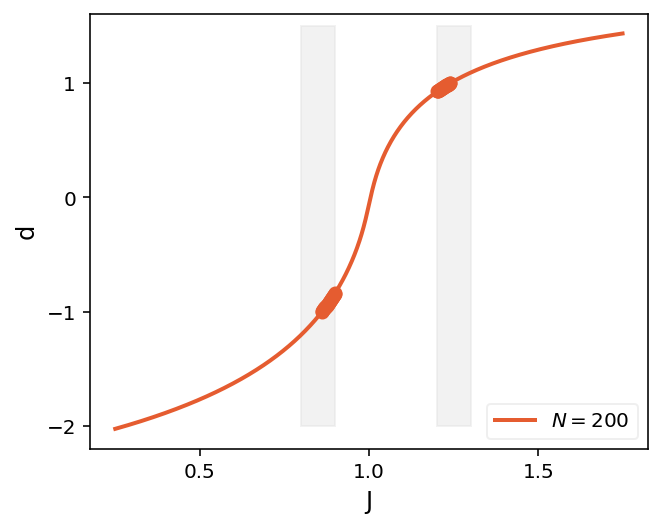

52


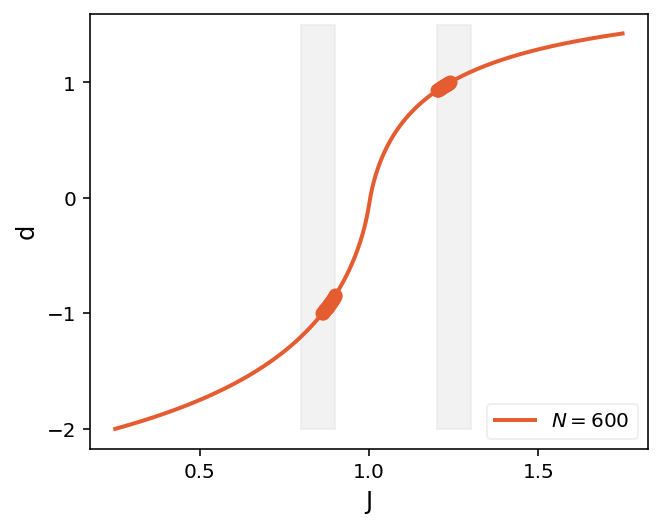

52


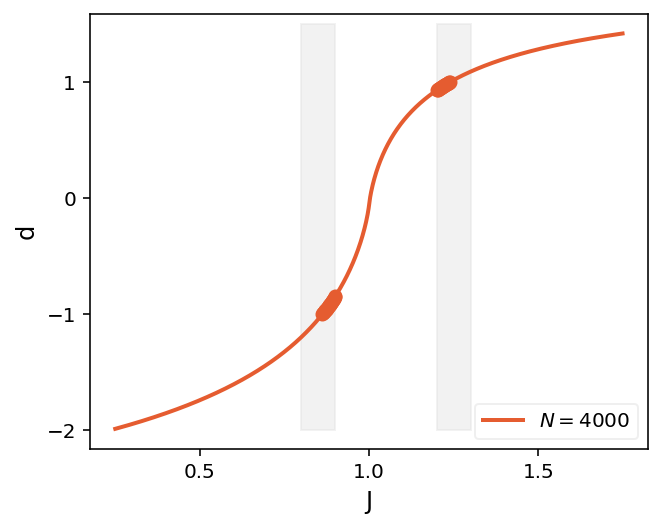

In [88]:
#Lambdakernel

Ns = [200, 600, 4000]

distanceJWfiles = ['dataJW/revisited/distance_ll' + str(N) + '.npy' for N in Ns]
supportJW = ['dataJW/revisited/supportvs_ll' + str(N) + '.npy' for N in Ns]

distanciaλ_int(Ns, distanceJWfiles, supportJW)




In [86]:
def distanciaλ_rdm(Ns, distance2files, support2):
    i=0

    for N, distance2file, supportvs2 in zip(Ns, distance2files, support2):
        data2 = np.load(distance2file, allow_pickle = True)
        Js2= data2[0]
        ds2=data2[1]
        supportvs2 = np.load(supportvs2, allow_pickle = True)
        plt.plot(Js2, ds2, c=c3, lw='2', label = '$N=$'+str(N))
        if supportvs2.all():
            for i, s in enumerate(supportvs2):
                #print(ds2[np.where(Js2==s)])
                plt.plot(s, ds2[np.where(Js2==s)], lw=0, marker='o', c=c3)
        #plt.title(str(N))
        plt.legend(fontsize=10, loc = "lower right", framealpha=0.3, numpoints=1)
        #i=i+1
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlabel(r'J', fontsize=12)
        plt.ylabel(r'd', fontsize=12)

        #plt.title('$N=$'+str(N), loc='center', fontsize=15, pad=-15)
        #plt.savefig('distancialambdardmtfg'+str(N)+'.pdf', bbox_inches='tight')
        plt.show()

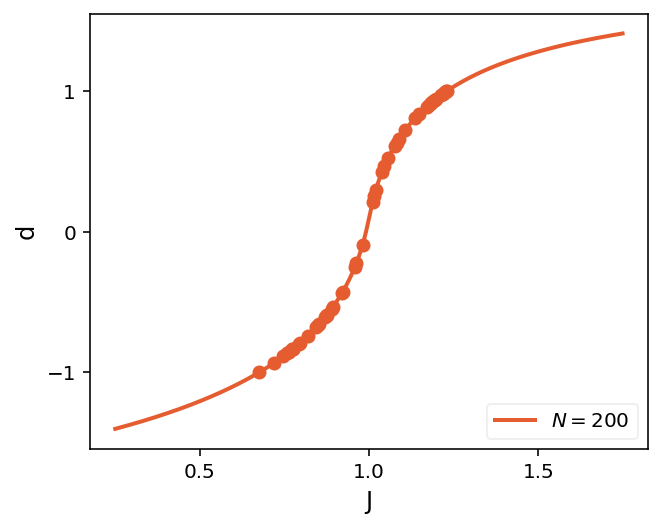

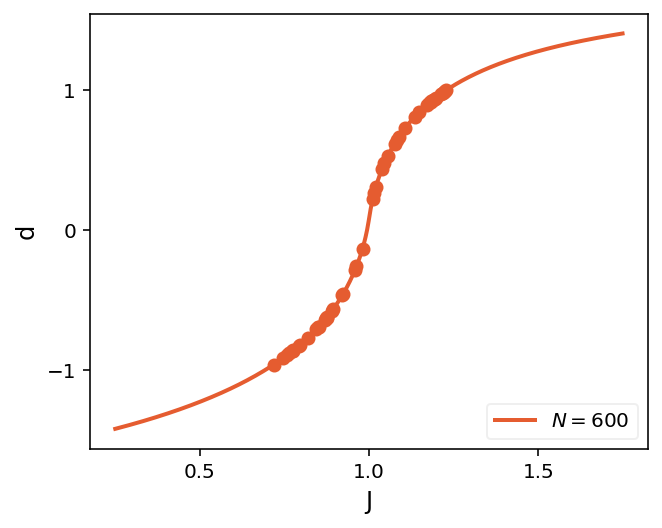

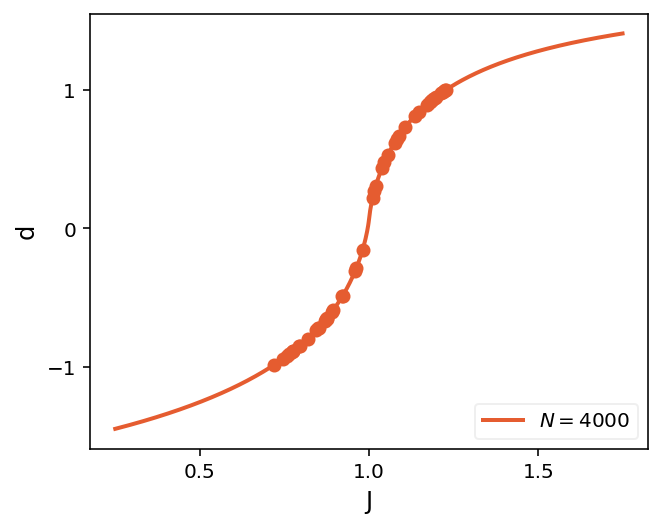

In [87]:
Ns = [200, 600, 4000]

distance2files = ['dataJW/revisited/distance_ll_random' + str(N) + '.npy' for N in Ns]
support2 = ['dataJW/revisited/supportvs_ll_random' + str(N) + '.npy' for N in Ns] 

distancia_rdm(Ns, distance2files, support2)

In [103]:
def k_dot(k1, k2):
    return np.sum(k1 * k2)

def k_norm(k):
    return np.sqrt(k_dot(k, k))

def custom_rand_kernel(m, x1, x2, y1, y2):
    k_cust = np.zeros((2 * m, 2 * m))
    
    k_cust[:m, :m] += np.random.uniform(x1, x2, (m, m)) # upper left block
    k_cust[m:, m:] += np.random.uniform(x1, x2, (m, m)) # lower right block
    k_cust[m:, :m] += np.random.uniform(y1, y2, (m, m)) # lower left block
    k_cust[:m, m:] += np.random.uniform(y1, y2, (m, m)) # upper right block
    
    np.fill_diagonal(k_cust, 1) # diagonal of 1s
    
    return k_cust

def center_kernel(k):
    kc = np.zeros(shape = k.shape)
    L = k.shape[0]
    
    avg_tot = np.sum(k) / (L ** 2)
    
    for idx, val in np.ndenumerate(k):
        avg_col = 0
        avg_row = 0
        
        for j in range(L):
            avg_col += k[j, idx[1]]
            avg_row += k[idx[0], j]
               
        avg_col *= 1/L
        avg_row *= 1/L
        
        
        kc[idx] = k[idx] - avg_col - avg_row + avg_tot
        
    return kc

def center_kernel_alt(k):
    kc = np.zeros(shape = k.shape)
    L = k.shape[0]
    
    avg_tot = np.sum(k) / (L ** 2)
    avg_cols = np.array([np.sum(k[:, i]) for i in range(L)]) / L
    avg_rows = np.array([np.sum(k[i, :]) for i in range(L)]) / L
    
    for idx, val in np.ndenumerate(k):
        kc[idx] = k[idx] - avg_cols[idx[1]] - avg_rows[idx[0]] + avg_tot
        
    return kc
        
    
def target_kernel(m, val_different_class):
    k_targ = np.zeros((2 * m, 2 * m))
    
    k_targ[:m, :m] += 1 # upper left block
    k_targ[m:, m:] += 1 # lower right block
    k_targ[m:, :m] += val_different_class # lower left block
    k_targ[:m, m:] += val_different_class # upper right block
    
    return k_targ

def alignment(k1, k2):
    return k_dot(k1, k2) / (k_norm(k1) * k_norm(k2))

def test_alignments(m, x1, x2, y1, y2, kernel1):
    plt.rcParams['figure.figsize'] = 10, 5
    plt.rcParams['lines.linewidth'] = 1.8
    plt.rcParams['font.size'] = 18

    Ns = np.logspace(0, 10, 100)
    print(len(Ns))

    A1s = []
    A2s = []
    checks = []

    custom = kernel1
    target0 = target_kernel(m, 0)
    targetm1 = target_kernel(m, -1)
    
    
    

    for N in Ns:
        customN = custom ** N

        A1 = alignment(customN, target0)
        A2 = alignment(customN, targetm1)
        check = (np.sum(customN) / (2 * m * k_norm(customN)) + A2) / np.sqrt(2)

        A1s.append(A1)
        A2s.append(A2)
        checks.append(check)

    
    plt.plot(Ns, A2s, label = 'target of m1s', c='k', ls='dashed')
    #plt.plot(Ns, A1s, label = 'target of 0s')
    #plt.plot(Ns, checks, ls = 'dotted')

    #plt.axhline(1 / np.sqrt(m), c = 'k', lw = 1.)
    plt.axhline(1 / np.sqrt(2 * m), c = 'k', lw = 1.)

    plt.ylim(0, 1)

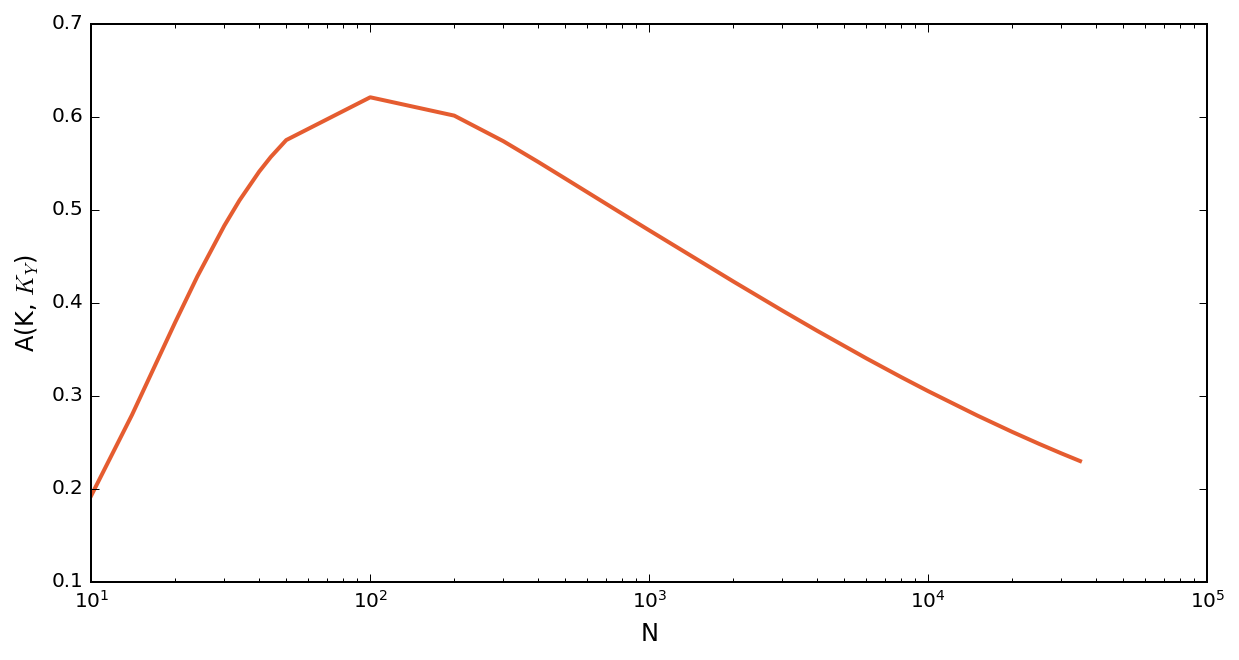

In [303]:
#ALIGNMENT


Ns2 = [10, 14, 20, 24, 30, 34, 40, 44, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 6000, 8000, 10000, 15000, 20000, 25000, 30000, 35000]

#Ns2=np.arange(100, 1001, 100)


kernel2files =['dataJW/KernelJWrdm' + str(N) + '.npy' for N in Ns2]
distance2files = ['dataJW/distanceJWrdm' + str(N) + '.npy' for N in Ns2]
Jtrainfile= 'dataJW/Jtrainrdm.npy'

Jtrain = np.load(Jtrainfile)
Jtrain=sorted(Jtrain)
Jtrain=np.asarray(Jtrain)
Ntrain=len(Jtrain)

"""kernel2files =['dataJW/revisited/KernelFidelity/Kernel_ll' + str(N) + '.npy' for N in Ns2]
distance2files = ['dataJW/revisited/KernelFidelity/distance_ll' + str(N) + '.npy' for N in Ns2]
Jtrainfiles= ['dataJW/revisited/KernelFidelity/Jtrain_ll'+ str(N) +'.npy'for N in Ns2]
   """ 

#print(y)
A = []

for N, distance2file, kernel2file in zip(Ns2, distance2files, kernel2files):
    kernel = np.load(kernel2file, allow_pickle = True)
    data2 = np.load(distance2file, allow_pickle = True)
    Js = data2[0].tolist()
    
    
    y = []
    y=np.where(Jtrain<1, -1, 1)
    
    k = np.empty((len(Jtrain), len(Jtrain)))
    Y = np.empty((len(Jtrain), len(Jtrain)))
    
    idx = []

    #construyo el training kernel
    for J in Js:
        if J in Jtrain:
            idx.append(Js.index(J))  
    
    for i, n in enumerate(idx, 0):
        for j, m in enumerate(idx, 0):
            k[i][j] = kernel[n][m]
    
    
    """if N==40:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernel"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()
    if N==500:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernel"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()"""

    #construyo la matriz Y
    for i, m in enumerate(y):
        for j, n in enumerate(y):
            Y[i][j] = m * n
    
    #print(k)
    #print(matrix)
    #1
    result = np.sum(Y*k) / (Ntrain*pow(np.sum(k*k),1/2))
    #print(result)
    #2
    """alignment = np.trace (np.dot(Y,k))
    result = alignment/(Ntrain*np.trace (np.dot(k,k)))"""
    #print(result)
    A.append(result)
    """if N==1000:
        kernel1=kernel**(1/N)"""
    

#print(A)


m = 500

x1 = 0.99
x2 = 1
y1 = 0.8
y2 = x1

#test_alignments(m, x1, x2, y1, y2, kernel1)

"""x1 = 0.98
x2 = 1
y1 = 0.9
y2 = x1

test_alignments(m, x1, x2, y1, y2)"""




plt.plot(Ns2, A, c=c3, lw='2', label = '$N=$'+str(N))
#plt.axhline(1 / np.sqrt(Ntrain), c = 'k' , ls='dashed', lw = 1)
plt.xscale('log')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'N', fontsize=12)
plt.ylabel(r'A(K, $K_Y$)', fontsize=12)
#plt.savefig("alignmentrdm.pdf", bbox_inches='tight')
plt.show()



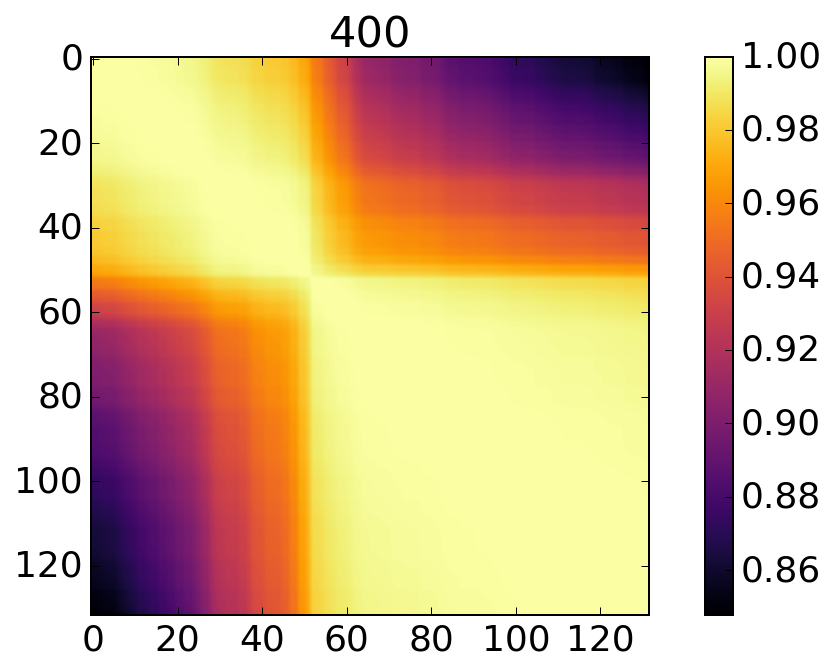

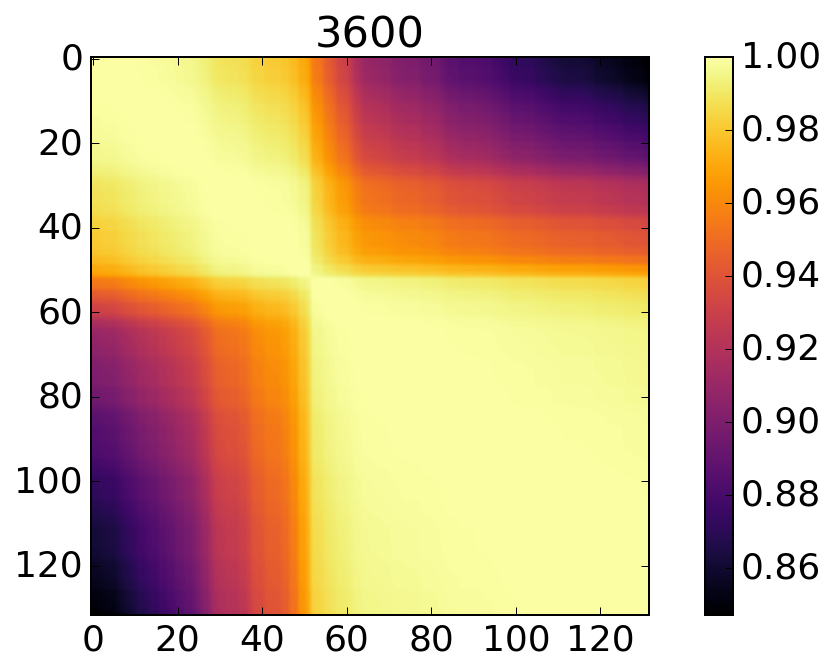

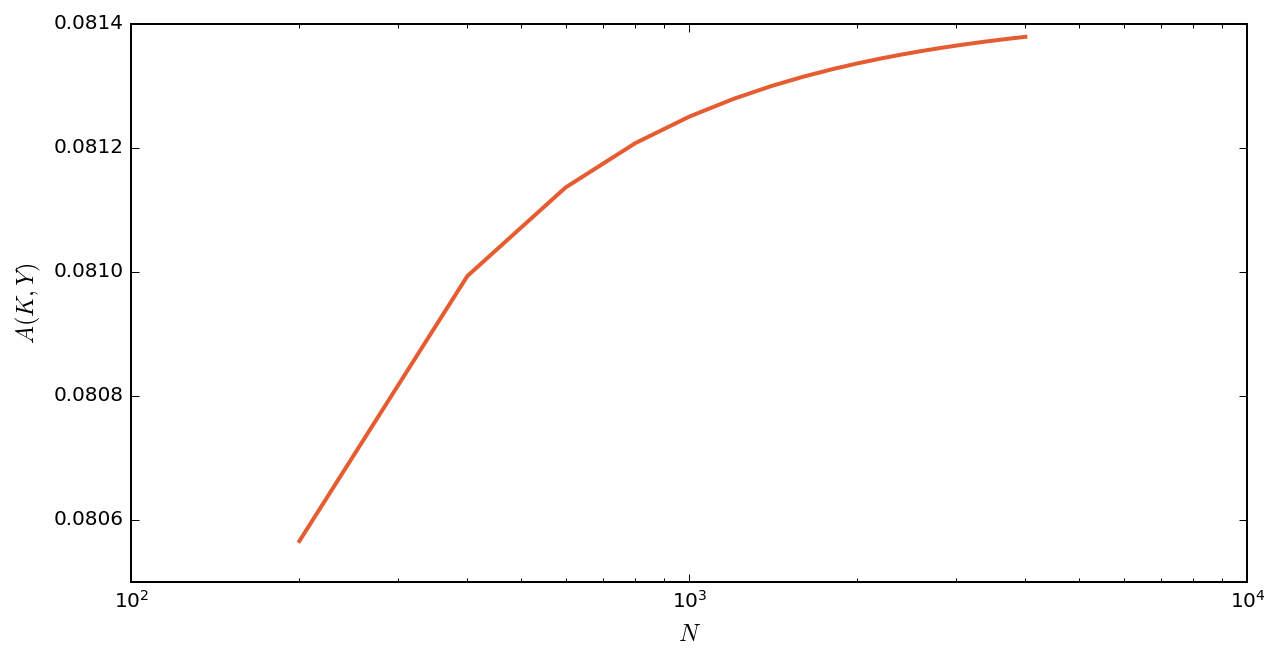

In [310]:
#ALIGNMENT

Ns2=np.arange(200, 4001, 200)

kernel2files =['dataJW/revisited/Kernel_ll_random' + str(N) + '.npy' for N in Ns2]
distance2files = ['dataJW/revisited/distance_ll_random' + str(N) + '.npy' for N in Ns2]
Jtrainfiles = ['dataJW/revisited/Jtrain_ll_random' + str(N) + '.npy' for N in Ns2]


A = []

for N, distance2file, kernel2file, Jtrainfile in zip(Ns2, distance2files, kernel2files, Jtrainfiles):
    kernel = np.load(kernel2file, allow_pickle = True)
    data2 = np.load(distance2file, allow_pickle = True)
    Js = data2[0].tolist()
    Jtrain = np.load(Jtrainfile)
    Jtrain=sorted(Jtrain)
    Jtrain=np.asarray(Jtrain)
    Ntrain=len(Jtrain)
    
    y = []
    y=np.where(Jtrain<1, -1, 1)
    
    k = np.empty((len(Jtrain), len(Jtrain)))
    Y = np.empty((len(Jtrain), len(Jtrain)))
    
    idx = []

    #construyo el training kernel
    for J in Js:
        if J in Jtrain:
            idx.append(Js.index(J))  
    
    for i, n in enumerate(idx, 0):
        for j, m in enumerate(idx, 0):
            k[i][j] = kernel[n][m]
            
    if N==400:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernelnew"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()
    if N==3600:
        plt.imshow(k, cmap = 'inferno')
        plt.title(str(N))
        plt.colorbar()
        plt.savefig("Kernelnew"+str(N)+'tfg.pdf', bbox_inches='tight')
        plt.show()
            
            
    """plt.imshow(k, cmap = 'inferno')
    plt.title(str(N))
    plt.colorbar()
    plt.show()"""

    #construyo la matriz Y
    for i, m in enumerate(y):
        for j, n in enumerate(y):
            Y[i][j] = m * n
    
    #print(k)
    result = np.sum(Y*k) / (Ntrain*pow(np.sum(k*k),1/2))
    #print(result)
    A.append(result)
    """if N==1000:
        kernel1=kernel**(1/N)"""

    

#print(A)


m = 500

x1 = 0.99
x2 = 1
y1 = 0.8
y2 = x1

#test_alignments(m, x1, x2, y1, y2, kernel1)

"""x1 = 0.98
x2 = 1
y1 = 0.9
y2 = x1

test_alignments(m, x1, x2, y1, y2)"""




plt.plot(Ns2, A, c=c3, lw='2', label = '$N=$'+str(N))
#plt.axhline(1 / np.sqrt(Ntrain), c = 'k' , ls='dashed', lw = 1)
plt.xscale('log')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.ylim(0.045, 0.046)
plt.xlabel(r'$N$', fontsize=12)
plt.ylabel(r'$A(K, Y)$', fontsize=12)
#plt.savefig("alignmentrdm.pdf", bbox_inches='tight')
plt.show()

In [241]:
def comparingtrainings(Ns, Nsrdm, distanceintfiles, distancerdmfiles, distanceintfiles2):
    
    plt.rcParams['figure.figsize'] = 5, 4
    plt.rcParams['lines.linewidth'] = 1.8
    plt.rcParams['font.size'] = 18

    Jcsinterval = []
    Jcsrandom = []
    Jcsint2 = []
    Jsbench = np.load('dataJW/JsBenchmark.npy', allow_pickle = True)
    Nsbench = np.load('dataJW/NsBenchmark.npy', allow_pickle = True)
    
    for N, distancefile in zip(Ns, distanceintfiles):
        data = np.load(distancefile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        
        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)
        
        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
        
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsinterval.append(Jcdistance)
    
    for N, distancerdmfile in zip(Nsrdm, distancerdmfiles):
        data = np.load(distancerdmfile, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsrandom.append(Jcdistance)
    print(len(Jcsrandom))
    for N, distance2file in zip(Ns, distanceintfiles2):
        data = np.load(distance2file, allow_pickle = True)
        Js= data[0]
        ds=data[1]

        mod_ds = np.abs(ds)
        idx = np.argmin(mod_ds)

        if ds[idx] < 0:
            Jl = Js[idx]
            dl = ds[idx]
            Jr = Js[idx + 1]
            dr = ds[idx + 1]

        else:
            Jl = Js[idx - 1]
            dl = ds[idx - 1]
            Jr = Js[idx]
            dr = ds[idx]
            
        Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
        Jcsint2.append(Jcdistance)
        
    from scipy.optimize import curve_fit


    f = lambda N, a, b, ν: b+ a * N**(-1. / ν)

    popt, pcov = curve_fit(f, Ns, Jcsrandom)

    plt.plot(Nsrdm, f(Nsrdm, popt[0], popt[1], popt[2]), c=c3,)
    print('nurdm = ', popt[2])
    print('b = ', popt[1])
    print('a = ', popt[0])
    print(pcov)

    popt, pcov = curve_fit(f, Ns, Jcsinterval)

    plt.plot(Ns, f(Ns, popt[0], popt[1], popt[2]), c=c2,)
    print('nuint = ', popt[2])
    print('b = ', popt[1])
    print('a = ', popt[0])
    print(pcov)


    plt.xlabel(r'$N$' , fontsize=12)
    plt.ylabel(r'$J_c(N)$', fontsize=12)
    
    plt.plot(Nsrdm, Jcsrandom, label = 'random', c=c3,  lw = 0, marker = 'o')
    plt.plot(Ns, Jcsinterval, label = '[0.8, 0.9]&[1.2, 1.3]', c=c2, lw = 0, marker = 'o')
    plt.legend(fontsize=8, loc = "upper right", framealpha=0.3, numpoints=1)
    plt.ylim(0.994, 1.006)
    plt.xlim(500, 4500)
    plt.axhline(1, c = 'k', lw = '1', ls='dotted')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    #plt.savefig("entrenarlambdatfg.pdf", bbox_inches='tight')
    plt.show()

16
nurdm =  0.9376882342220793
b =  0.995936749173636
a =  -1.891005801093586
[[2.07086217e-02 9.06374244e-07 1.47016822e-03]
 [9.06374244e-07 4.19223355e-11 6.47580682e-08]
 [1.47016822e-03 6.47580682e-08 1.04460264e-04]]
nuint =  1.0896376541007422
b =  1.0024112484814354
a =  0.27080645504779854
[[ 4.79449743e-05  7.63595937e-09 -3.27448777e-05]
 [ 7.63595937e-09  1.26859496e-12 -5.24578411e-09]
 [-3.27448777e-05 -5.24578411e-09  2.23838120e-05]]


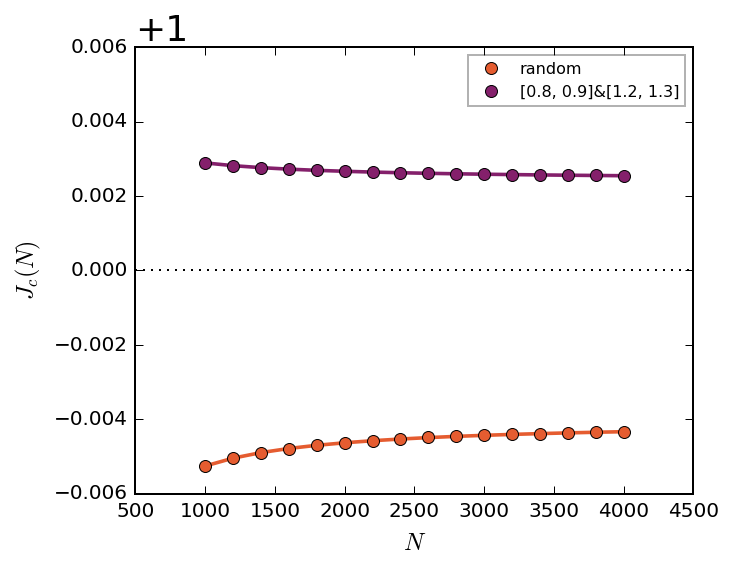

In [242]:
#KernelLambda

Ns = np.arange(1000, 4001, 200)

distanceintfiles = ['dataJW/revisited/distance_ll' + str(N) + '.npy' for N in Ns]
distancerdmfiles = ['dataJW/revisited/distance_ll_random' + str(N) + '.npy' for N in Ns]


comparingtrainings(Ns, Ns, distanceintfiles, distancerdmfiles, distanceintfiles)

